Experiment Setup: Prompt without dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the csv file
df = pd.read_csv('output-exp2.csv')

# Remove rows with syntax column other than valid and invalid
df = df[df['Syntax_Check'].isin(['Valid', 'Invalid'])]

# Replace empty DevOps_Aware_Score with 0
df['DevOps_Aware_Score'] = df['DevOps_Aware_Score'].fillna(0)

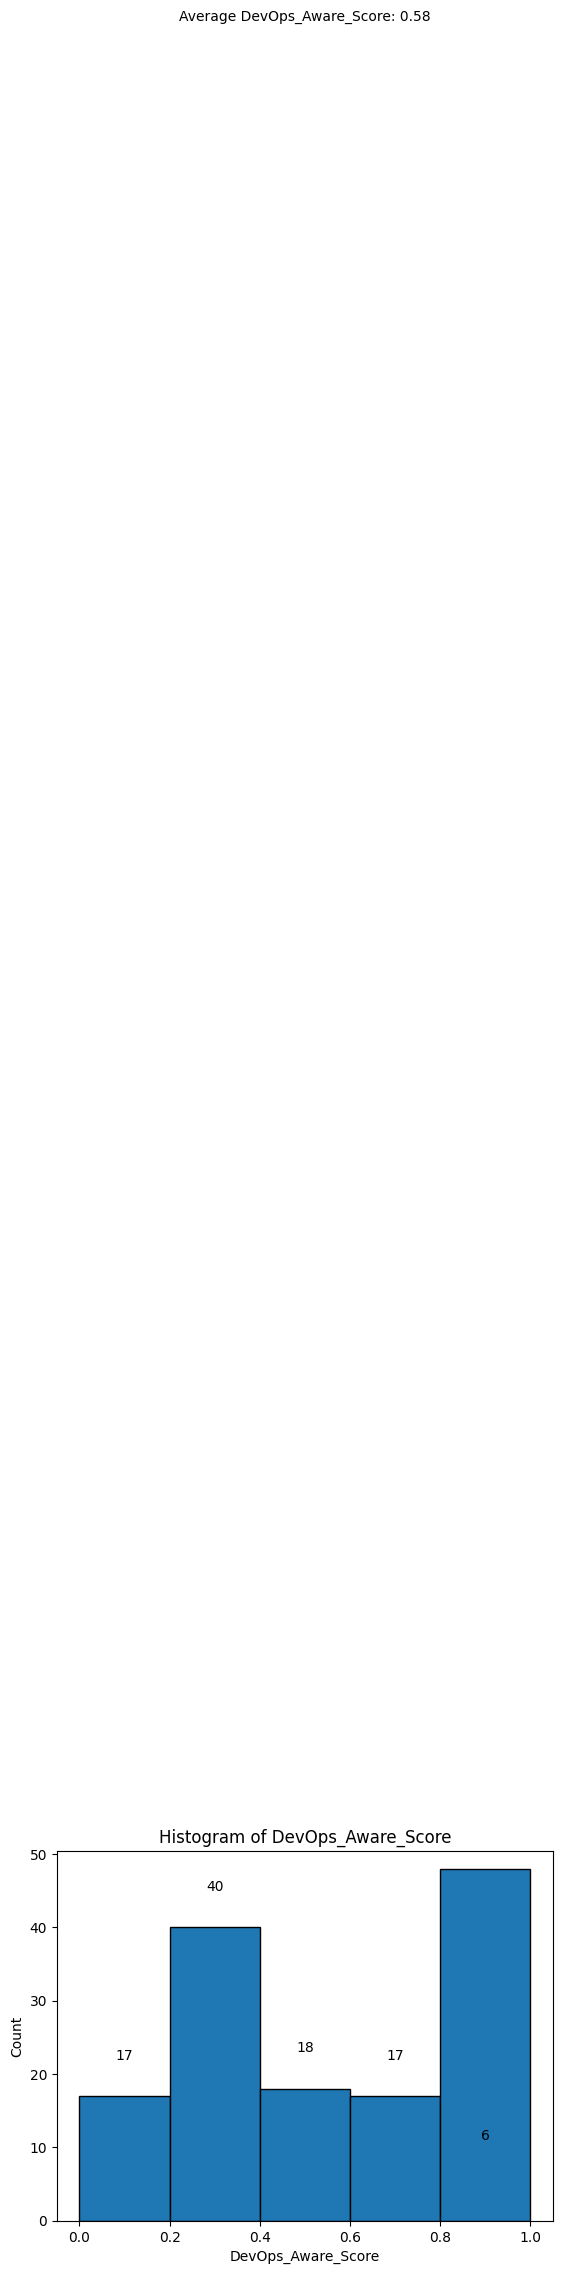

In [3]:
# create histogram
plt.hist(df['DevOps_Aware_Score'], bins=5, range=(0, 1), edgecolor='black')

# set labels and title
plt.xlabel('DevOps_Aware_Score')
plt.ylabel('Count')
plt.title('Histogram of DevOps_Aware_Score')

# show count on top of each histogram
for i in range(5):
    count = len(df[(df['DevOps_Aware_Score'] >= i*0.2) & (df['DevOps_Aware_Score'] < (i+1)*0.2)])
    plt.text(i*0.2+0.1, count+5, str(count), ha='center')
    
# Print average DevOps_Aware_Score on top of the histogram
plt.text(0.5, 300, 'Average DevOps_Aware_Score: ' + str(round(df['DevOps_Aware_Score'].mean(), 2)), ha='center')

# show the plot
plt.show()

/tmp/ipykernel_1882/3276118411.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = grouped_data.iloc[i][j]


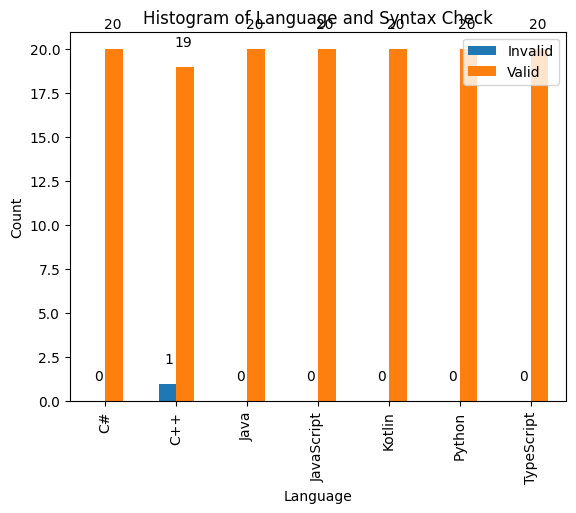

In [4]:
# Group the data by language and syntax check
grouped_data = df.groupby(['Language', 'Syntax_Check']).size().unstack()

#plot histogram with multibar plot for each language and syntax check combination 
grouped_data.plot(kind='bar', stacked=False)

# add legend
plt.legend(loc='upper right')

#add count on top of each bar in histogram int only and if value is nan or infinities then replace it with 0

for i in range(len(grouped_data)):
    for j in range(2):
        count = grouped_data.iloc[i][j]
        if count == float('inf') or count == float('-inf') or count != count:
            count = 0
        plt.text(i + j * 0.2 - 0.1, count + 1, str(int(count)), ha='center', va='bottom')


# Set labels and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Histogram of Language and Syntax Check')

# Show the plot
plt.show()

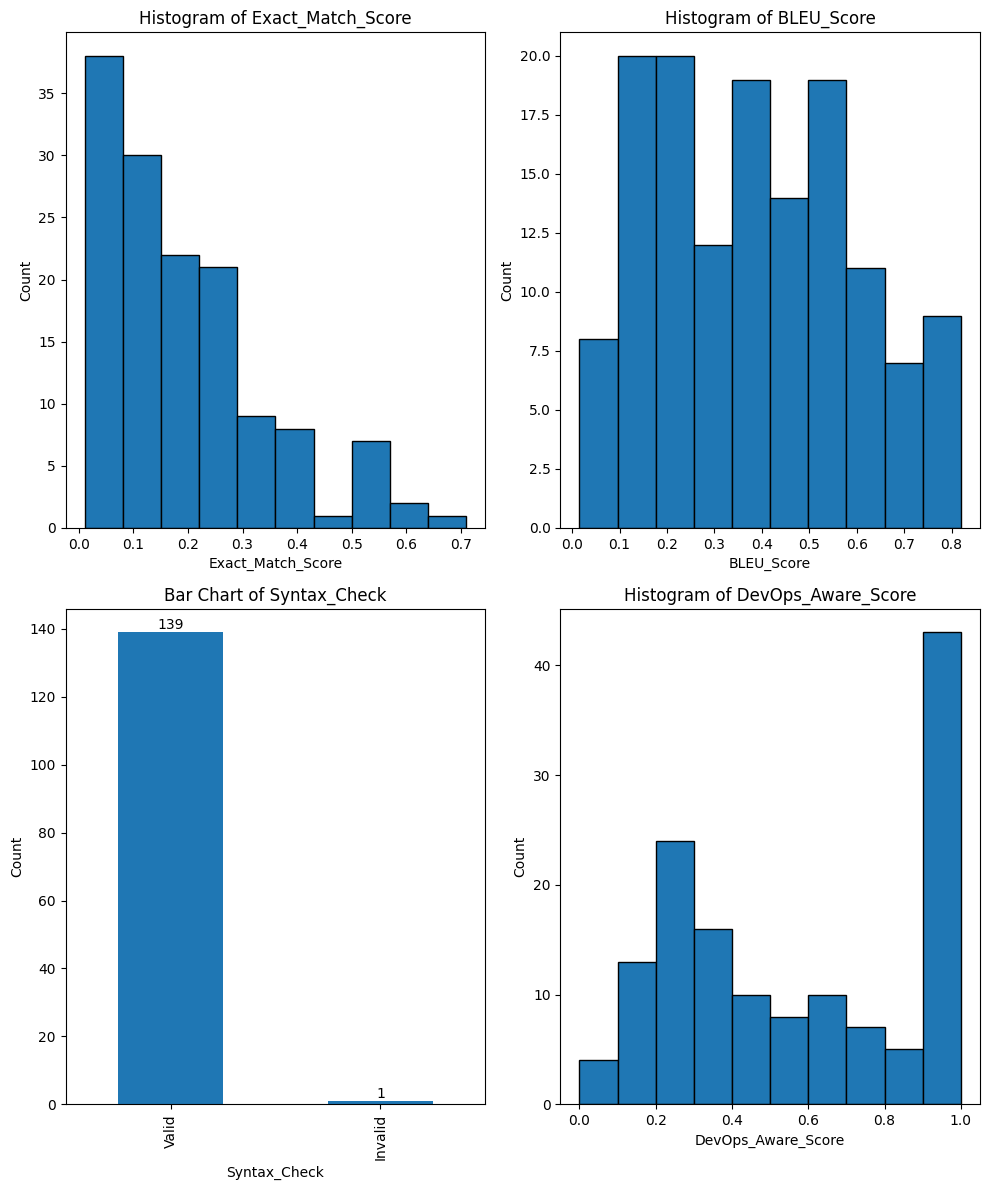

In [5]:
# Set a larger figure size
plt.figure(figsize=(10, 12))

# Plot histogram of Exact_Match_Score
plt.subplot(2, 2, 1)
plt.hist(df['Exact_Match_Score'], bins=10, edgecolor='black')
plt.xlabel('Exact_Match_Score')
plt.ylabel('Count')
plt.title('Histogram of Exact_Match_Score')


# Plot histogram of BLEU_Score
plt.subplot(2, 2, 2)
plt.hist(df['BLEU_Score'], bins=10, edgecolor='black')
plt.xlabel('BLEU_Score')
plt.ylabel('Count')
plt.title('Histogram of BLEU_Score')


# Plot bar chart of Syntax_Check
plt.subplot(2, 2, 3)
syntax_check_counts = df['Syntax_Check'].value_counts()
syntax_check_counts.plot(kind='bar')
plt.xlabel('Syntax_Check')
plt.ylabel('Count')
plt.title('Bar Chart of Syntax_Check')

# Add count on top of each bar
for i in range(len(syntax_check_counts)):
    count = syntax_check_counts.iloc[i]
    plt.text(i, count, str(count), ha='center', va='bottom')

# Plot histogram of DevOps_Aware_Score
plt.subplot(2, 2, 4)
plt.hist(df['DevOps_Aware_Score'], bins=10, edgecolor='black')
plt.xlabel('DevOps_Aware_Score')
plt.ylabel('Count')
plt.title('Histogram of DevOps_Aware_Score')



# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 1200x800 with 0 Axes>

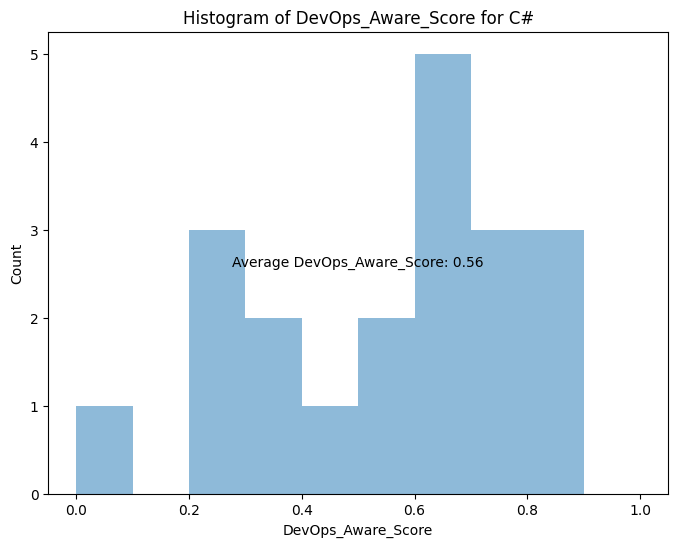

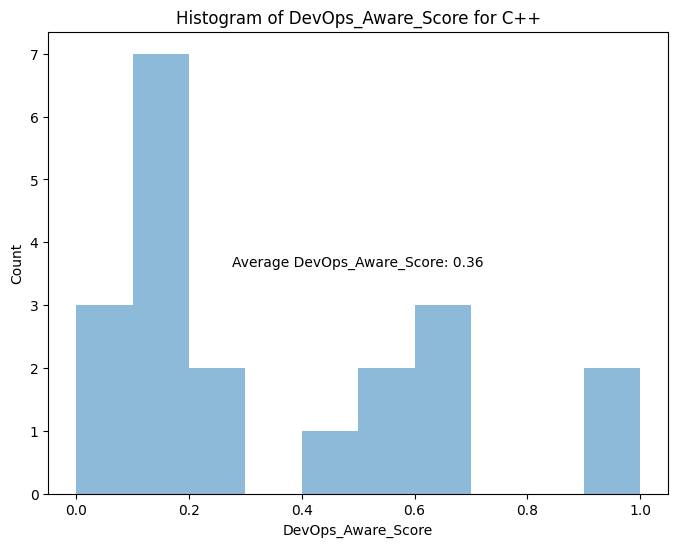

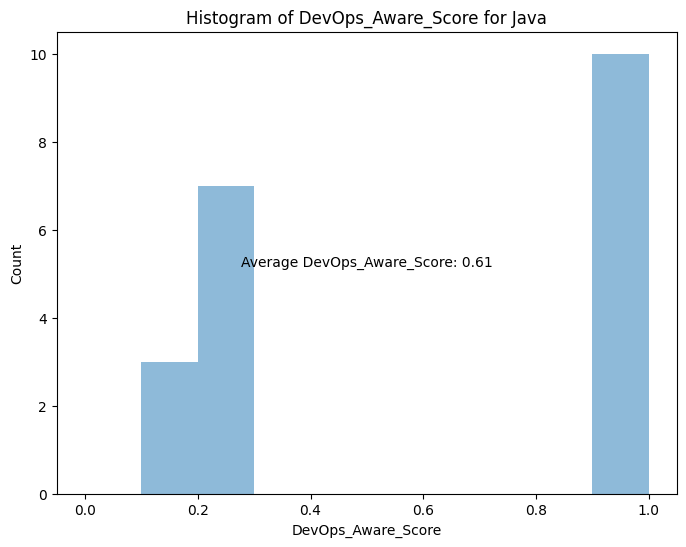

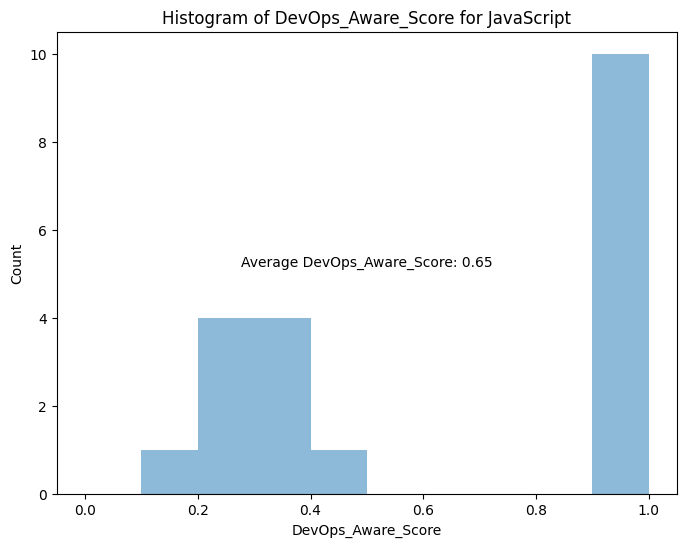

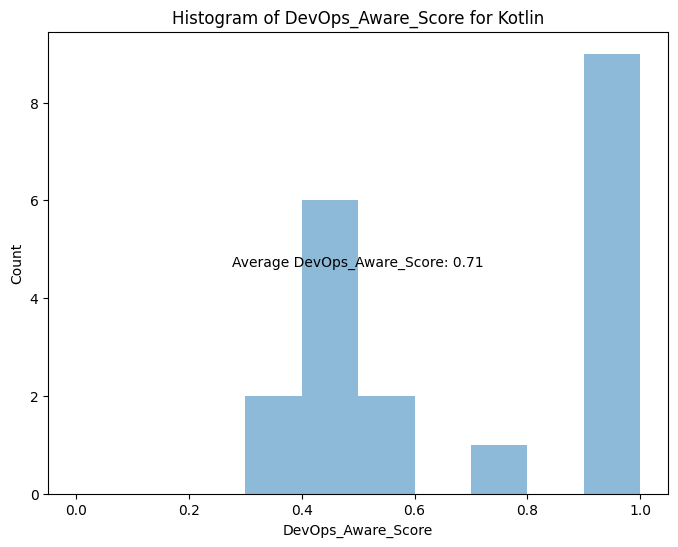

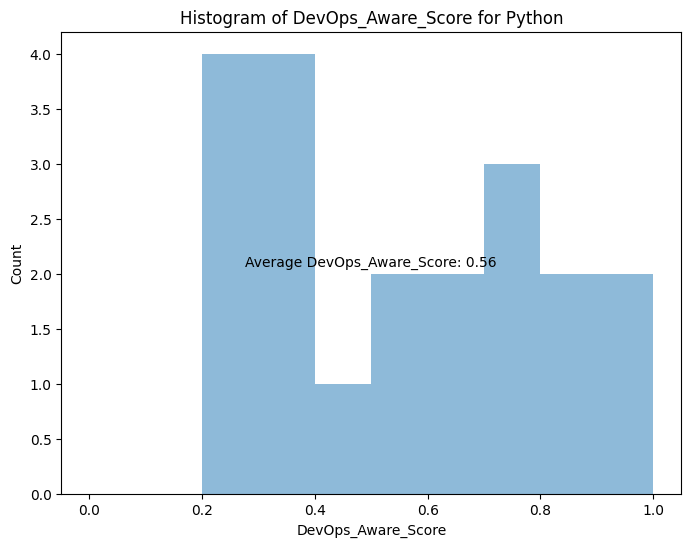

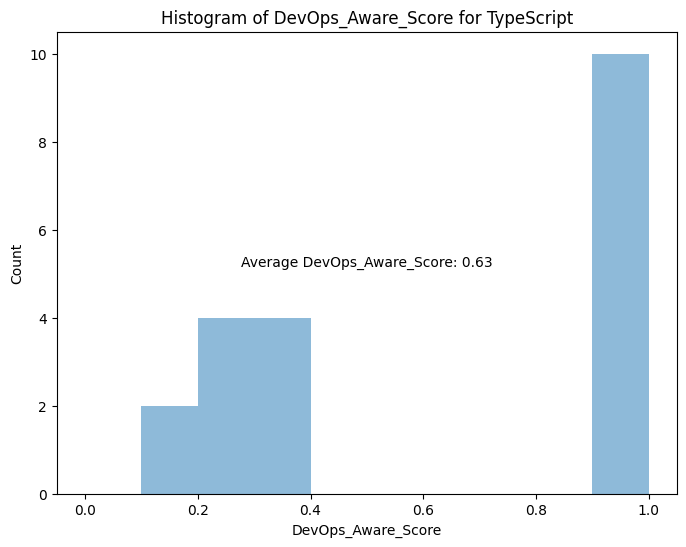

In [6]:
grouped_data = df.groupby('Language')

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Iterate over each group and create a separate plot for each language
for language, group in grouped_data:
    # Create a new figure for each language
    plt.figure(figsize=(8, 6))
    
    # Plot histogram for the current language
    plt.hist(group['DevOps_Aware_Score'], bins=10, range=(0, 1), alpha=0.5)
    
    # Print average DevOps_Aware_Score for the current language on the plot
    plt.text(0.5, 0.5, f'Average DevOps_Aware_Score: {group["DevOps_Aware_Score"].mean():.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    
    # Set labels and title for the current plot
    plt.xlabel('DevOps_Aware_Score')
    plt.ylabel('Count')
    plt.title(f'Histogram of DevOps_Aware_Score for {language}')
    
    # Show the plot for the current language
    plt.show()